**Basic Time Series Analysis on Cryptocurrency Historical Prices**

In [1]:
import numpy as np 
import pandas as pd 
import os
#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))



In [2]:

import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
from pandas import DataFrame
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [3]:
df = pd.read_csv('ethereum_price.csv')
df.head(3)

Date    Open    High     Low   Close         Volume      Market Cap
0  Aug 07, 2017  261.24  271.96  256.69  269.18    935,727,000  24,511,000,000
1  Aug 06, 2017  256.42  271.05  252.85  261.57  1,482,980,000  24,053,500,000
2  Aug 05, 2017  222.85  256.51  221.95  256.51  1,333,000,000  20,900,000,000

In [4]:
print (df.describe())


             Open        High         Low       Close
count  732.000000  732.000000  732.000000  732.000000
mean    39.138098   41.261176   37.085668   39.493305
std     79.033720   83.155622   74.491504   79.492491
min      0.431589    0.482988    0.420897    0.434829
25%      2.735000    3.005000    2.507500    2.722500
50%     10.930000   11.205000   10.555000   10.945000
75%     13.992500   14.452500   13.425000   14.005000
max    397.590000  414.760000  370.060000  401.490000


In [5]:
print (df.dtypes)

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object


In [6]:
df1 = df[['Date','Close']]
df1.head(3)

Date   Close
0  Aug 07, 2017  269.18
1  Aug 06, 2017  261.57
2  Aug 05, 2017  256.51

In [7]:
# Setting the Date as Index
df_ts = df1.set_index('Date')
df_ts.sort_index(inplace=True)
print (type(df_ts))
print (df_ts.head(3))
print (df_ts.tail(3))

<class 'pandas.core.frame.DataFrame'>
              Close
Date               
Apr 01, 2016  11.66
Apr 01, 2017  50.70
Apr 02, 2016  11.60
                  Close
Date                   
Sep 29, 2016  13.070000
Sep 30, 2015   0.738644
Sep 30, 2016  13.220000


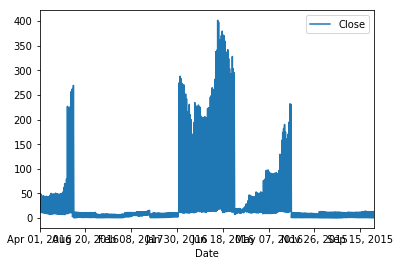

In [8]:
#plot
df_ts.plot()

In [9]:
# Dickey Fuller Test Function
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    from statsmodels.tsa.stattools import adfuller
    print('Results of Dickey-Fuller Test:')
       
    dftest = adfuller(timeseries, autolag='AIC')
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)

In [11]:
# Stationarity with Dickey Fuller Test 
# Convert the DF to series first
ts = df_ts['Close']
test_stationarity(ts)

Results of Dickey-Fuller Test:
Test Statistic                  -2.659276
p-value                          0.081354
#lags Used                       4.000000
Number of Observations Used    727.000000
Critical Value (1%)             -3.439377
Critical Value (5%)             -2.865524
Critical Value (10%)            -2.568891
dtype: float64


**Conclusion??**

The Test Statistics value is Much higher than critical value. So we can't reject the Null Hypothesis.

Hence from the plot the Time series is Non-Stationary

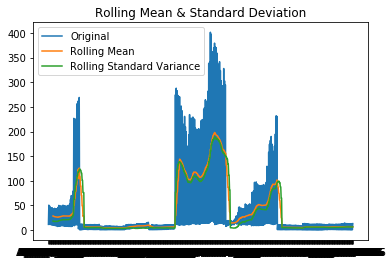

In [12]:
# plot the 12-Month Moving Rolling Mean, Variance 
# Rolling Statistics
rolmean = ts.rolling(window=12).mean()
rolvar = ts.rolling(window=12).std()

plt.plot(ts, label='Original')
plt.plot(rolmean, label='Rolling Mean')
plt.plot(rolvar, label='Rolling Standard Variance')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)